In [1]:
import numpy as np

In [2]:
# Step 1: Define a function to calculate the Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [3]:
# Step 2: Implement the K-NN classifier
def knn(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        # Sort distances and return indices of k nearest neighbors
        nearest_indices = np.argsort(distances)[:k]
        # Get the labels of k nearest neighbors
        nearest_labels = [y_train[i] for i in nearest_indices]
        # Predict the label by majority vote
        predicted_label = max(set(nearest_labels), key=nearest_labels.count)
        predictions.append(predicted_label)
    return predictions

In [4]:
# Step 3: Define a function to calculate accuracy and confusion matrix
def evaluate(y_true, y_pred):
    confusion_matrix = np.zeros((len(np.unique(y_true)), len(np.unique(y_true))))
    for yt, yp in zip(y_true, y_pred):
        confusion_matrix[yt][yp] += 1
    accuracy = np.sum([confusion_matrix[i][i] for i in range(len(confusion_matrix))]) / len(y_true)
    return accuracy, confusion_matrix

In [5]:
# Step 4: Define a function to split the dataset into train and test sets
def train_test_split(X, y, test_size=0.2):
    assert len(X) == len(y), "X and y should have the same length"
    size = int(len(X) * (1 - test_size))
    indices = np.random.permutation(len(X))
    train_indices, test_indices = indices[:size], indices[size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [7]:
# Step 5: Load your dataset and split it into train and test sets

from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
# Step 6: Test the K-NN model
k_values = [1, 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 ]  # Different values of k to test
accuracies = []

for k in k_values:
    y_pred = knn(X_train, y_train, X_test, k)
    accuracy, _ = evaluate(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.2f}")

Accuracy for k=1: 0.93
Accuracy for k=2: 0.93
Accuracy for k=3: 0.93
Accuracy for k=4: 0.93
Accuracy for k=5: 0.93
Accuracy for k=6: 0.93
Accuracy for k=7: 0.90
Accuracy for k=8: 0.90
Accuracy for k=9: 0.90
Accuracy for k=10: 0.90


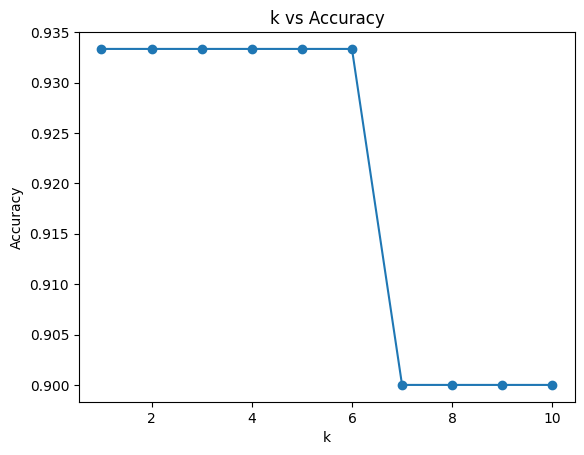

In [12]:
# Step 7: Plot the curve "k vs accuracy"
import matplotlib.pyplot as plt
plt.plot(k_values, accuracies, marker='o')
plt.title('k vs Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [13]:
# Step 8: Find the value of k for maximum accuracy
max_accuracy_k = k_values[np.argmax(accuracies)]
print(f"Value of k for maximum accuracy: {max_accuracy_k}")

Value of k for maximum accuracy: 1
